# **Extracting the Zip files**

In [1]:
import zipfile
import os

# Zip file path
zip_file_path = '/content/drive/MyDrive/train data/traindata.zip'

# extracting file directory
extract_to = 'heartrate'

# Create the directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")

Files extracted to heartrate


# **Section 1: Import Libraries**

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


# **Section 2: Load and Merge Datasets**

In [19]:
# Load the datasets
frequency_data = pd.read_csv('/content/heartrate/traindata/Train Data Zip/frequency_domain_features_train.csv')
non_linear_data = pd.read_csv('/content/heartrate/traindata/Train Data Zip/heart_rate_non_linear_features_train.csv')
time_domain_data = pd.read_csv('/content/heartrate/traindata/Train Data Zip/time_domain_features_train.csv')

# Merge the datasets on 'uuid'
merged_data = pd.merge(frequency_data, non_linear_data, on='uuid')
merged_data = pd.merge(merged_data, time_domain_data, on='uuid')

# Drop 'uuid' column
merged_data = merged_data.drop(columns=['uuid'])

# Check for non-numeric columns and drop them if needed
merged_data = merged_data.select_dtypes(exclude=['object'])


# **Section 3: Split Data into Features and Target**

In [20]:
# Split features (X) and target (y)
X = merged_data.drop(columns=['HR'])  # Features (everything except heart rate)
y = merged_data['HR']  # Target (heart rate)


# **Section 4: Train-Test Split and Data Standardization**

In [21]:
# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for Conv1D input (samples, time steps, features)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)


# **Section 5: Build and Compile CNN Model**

In [22]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Section 6: Train the Model**

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
500/500 - 6s - 12ms/step - loss: 478.1397 - mae: 15.3218 - val_loss: 53.2696 - val_mae: 6.3498
Epoch 2/50
500/500 - 3s - 7ms/step - loss: 117.3121 - mae: 8.5699 - val_loss: 22.5771 - val_mae: 3.9745
Epoch 3/50
500/500 - 2s - 4ms/step - loss: 110.6807 - mae: 8.3463 - val_loss: 65.9616 - val_mae: 7.7936
Epoch 4/50
500/500 - 2s - 5ms/step - loss: 107.8503 - mae: 8.2280 - val_loss: 55.3256 - val_mae: 7.0547
Epoch 5/50
500/500 - 2s - 5ms/step - loss: 104.5075 - mae: 8.1038 - val_loss: 50.6442 - val_mae: 6.8202
Epoch 6/50
500/500 - 4s - 8ms/step - loss: 104.0317 - mae: 8.0796 - val_loss: 117.7633 - val_mae: 10.6193
Epoch 7/50
500/500 - 2s - 5ms/step - loss: 102.4163 - mae: 7.9924 - val_loss: 36.0681 - val_mae: 5.7110
Epoch 8/50
500/500 - 2s - 4ms/step - loss: 99.8881 - mae: 7.9543 - val_loss: 15.6875 - val_mae: 3.5821
Epoch 9/50
500/500 - 3s - 5ms/step - loss: 100.2750 - mae: 7.9294 - val_loss: 49.0666 - val_mae: 6.7836
Epoch 10/50
500/500 - 2s - 5ms/step - loss: 97.3504 - mae: 7.

# **Section 7: Make Predictions and Evaluate the Model Using MSE, RMSE, and R-squared**

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Reshape y_test and y_pred for easier evaluation
y_test = np.array(y_test)
y_pred = y_pred.flatten()

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error (MSE): 4.3427878415901064
Root Mean Squared Error (RMSE): 2.083935661576457
R-squared (R²): 0.9606378917542243


# **Section 8: Visualization - Line Plot (Predicted vs Actual Heart Rate)**

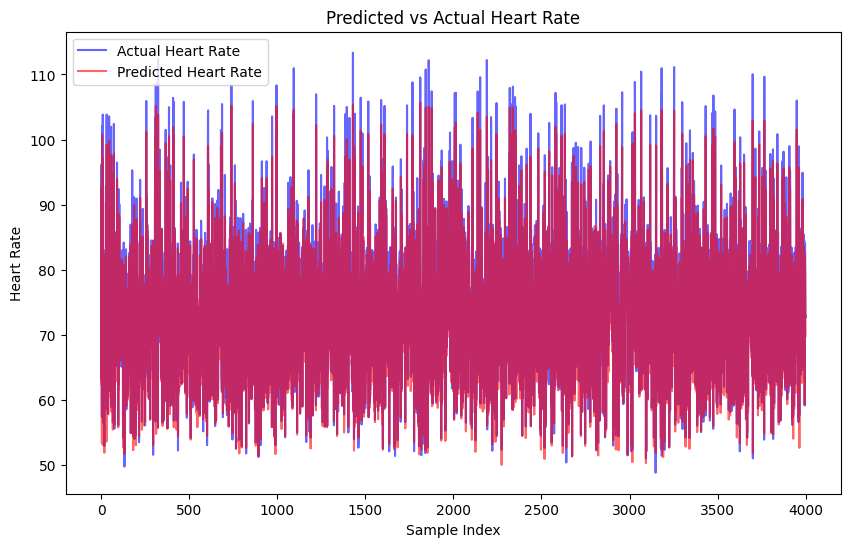

In [25]:
# Line Plot: Predicted vs Actual Heart Rate
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Heart Rate', color='b', alpha=0.6)
plt.plot(y_pred, label='Predicted Heart Rate', color='r', alpha=0.6)
plt.title('Predicted vs Actual Heart Rate')
plt.xlabel('Sample Index')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()


# **Section 9: Visualization - Scatter Plot (Predicted vs Actual Heart Rate)**

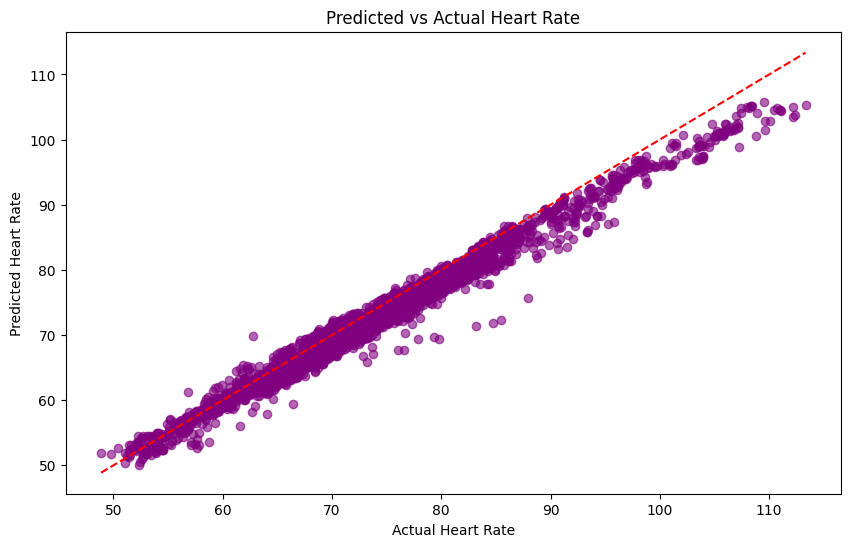

In [26]:
# Scatter Plot: Predicted vs Actual Heart Rate
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.title('Predicted vs Actual Heart Rate')
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')  # Diagonal line
plt.show()
